<a href="https://colab.research.google.com/github/alfarafimaulana/Pemrogaman_Python/blob/main/tugas_python_assingment_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Muhammad Alfarafi Maulana Firdausa
#1101184385

In [161]:
#parameter
tTower = 80 # meter
tUser = 1.5
jarakMin = 300 # jarak 300-1000 m
jarakMax = 1000
JUser = 200
Dtrans = 30 # Watt
GAPengirim = 10 # dB
GAPenerima = 2 # dB
bandwith = 5 #MHz
bandwithSys  = bandwith * 1000000 #Hz
freqFungsiawal = 1800 #MHz

#freq untuk fungsi ganjil
freq1 = 700 #MHz
freq2 = 900 #MHz
freq3 = 1800 #MHz

#untuk fungsi pengubah lokasi = fungsi ganjil
#untuk fungsi pegubah freq = fungsi genap

d = list(range(jarakMin, jarakMax))

In [162]:
# rumus kemarin
#parameter pengubah

fc1 = freqFungsiawal #untuk fungsi ganjil

#fungsi

def hitungcm(freq): # untuk ngitung cm, pathloss
  cm1 = 0 #urban
  cm2 = (-2)*(np.log10(freq/28)*(np.log10(freq/28)-5.4)) #suburban
  cm3 = ((-4.58)*np.log10(freq)*np.log10(freq)+18.33*np.log10(freq)-40.94) #open
  return cm1,cm2,cm3

def nentuC(freq): #hitung c1 c2 pathloss
  if 400 <= freq <= 1500 :
    c1 = 69.55
    c2 = 26.16
  if 1500 < freq <= 2000 :
    c1 = 69.55
    c2 = 26.16
  return c1,c2

def ahrhitung(fc):# hitung ahr, pathloss
    ahr = ((1.1*(np.log10(fc))-0.7)*tUser-(1.56*(np.log10(fc))-0.8))
    return ahr
#converter
def converterPD(power): #power to dBm
  dbm = 10*np.log10(power)+30
  return dbm
def converterDP(dBm):
  Watt =  (10**(dBm/10))
  return Watt

#untuk fungsi ganjil
cm1 = hitungcm(fc1)

CC1 = nentuC(fc1)

ahr1 = ahrhitung(fc1)


#untuk fungsi genap
cm21 = hitungcm(freq1)
cm22 = hitungcm(freq2)
cm23 = hitungcm(freq3)

CC21 = nentuC(freq1)
CC22 = nentuC(freq2)
CC23 = nentuC(freq3)

ahr21 = ahrhitung(freq1)
ahr22 = ahrhitung(freq2)
ahr23 = ahrhitung(freq3)


def lphitung(fc,ahr,c1,c2,cm,d,ht) : #ht = tinggi transmitter, d = jarak, cm = cm, ahr = ahr, perlu c1 sam c2
        lp = c1 + c2*np.log10(fc)-13.83*np.log(ht)-ahr+(44.9-6.55*np.log10(ht))*np.log10(d)+cm
        return lp

#hitung pathloss udah dalam dB untuk fungsi ganjil dan genap

# hitung fungsi ganjil(pengubah lokasi), semua pathloss sudah dalam dB
# fc1,ahr1,CC1,cm1 untuk fungsi ganjil atau fungsi yang mebgubah lokasi
lp11 = lphitung(fc1,ahr1,CC1[0],CC1[1],cm1[0],d,tTower) #untuk urban 
lp12 = lphitung(fc1,ahr1,CC1[0],CC1[1],cm1[1],d,tTower) #untuk suburban
lp13 = lphitung(fc1,ahr1,CC1[0],CC1[1],cm1[2],d,tTower) #untuk open

# hitung fungsi genap(pengubah freq)

lp21 = lphitung(freq1,ahr21,CC21[0],CC21[1],cm21[0],d,tTower)
lp22 = lphitung(freq2,ahr22,CC22[0],CC22[1],cm22[0],d,tTower)
lp23 = lphitung(freq3,ahr23,CC23[0],CC23[1],cm23[0],d,tTower)

dbmm = converterPD(50)
print(dbmm)
power = converterDP(dbmm)
print(power)

46.98970004336019
49999.99999999999


In [167]:
#fungsi-fungsi baru
#yang dibutuhkan
dbm = converterPD(Dtrans)

#Fungsi
def tDaya(Ptx,PL,Gtx,Grx): #perlu input dtrans, pathloss, GAPengirim, GAPenerima; 
 daya = Ptx-PL+Gtx+Grx
 Prx = converterDP(daya)
 return Prx

def snr(Prx,BW): #cari snr perlu tDaya sama BW
  noise = -174+10*np.log10(BW)
  cvnoise = converterDP(noise)
  SNR = Prx/cvnoise
  return SNR

def kap(SNR,BW):
  kapasitas = BW * np.log2(1+SNR)
  return kapasitas



#hitungannya
#plot pertama, fungsi ganjil, ubah lokasi, cari daya terima
Prx11 = tDaya(dbm,lp11,GAPengirim,GAPenerima)
Prx12 = tDaya(dbm,lp12,GAPengirim,GAPenerima)
Prx13 = tDaya(dbm,lp13,GAPengirim,GAPenerima)
#plot kedua, fungsi genap, ubah freq, cari daya terima
Prx21 = tDaya(dbm,lp21,GAPengirim,GAPenerima)
Prx22 = tDaya(dbm,lp22,GAPengirim,GAPenerima)
Prx23 = tDaya(dbm,lp23,GAPengirim,GAPenerima)
#plot ketiga
SNR11 = snr(Prx11,bandwithSys)
SNR12 = snr(Prx12,bandwithSys)
SNR13 = snr(Prx13,bandwithSys)
#plot keempat
SNR21 = snr(Prx21,bandwithSys)
SNR22 = snr(Prx22,bandwithSys)
SNR23 = snr(Prx23,bandwithSys)
#plot kelima
kap11 = kap(SNR11,bandwithSys)
kap12 = kap(SNR12,bandwithSys)
kap13 = kap(SNR13,bandwithSys)
#plot kelima
kap21 = kap(SNR21,bandwithSys)
kap22 = kap(SNR22,bandwithSys)
kap23 = kap(SNR23,bandwithSys)



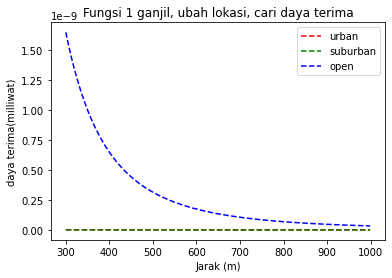

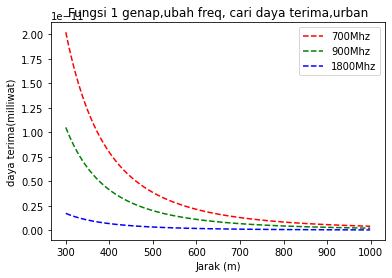

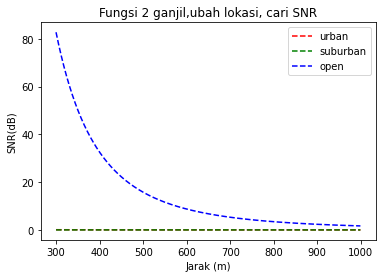

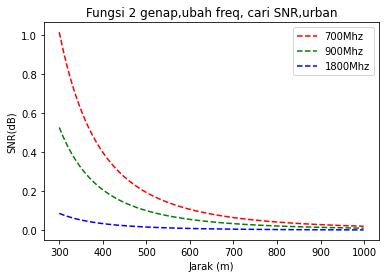

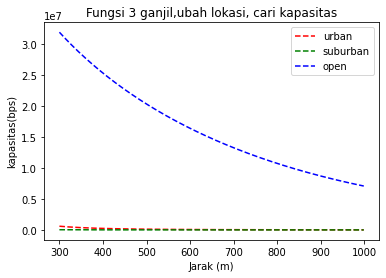

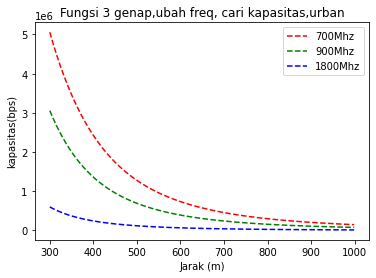

In [170]:
#tempat plot
#plot 1, 
plt.figure()
plt.plot(d,Prx11,'r--', label='urban')
plt.plot(d,Prx12,'g--', label='suburban')
plt.plot(d,Prx13,'b--', label='open')
plt.legend()
plt.title('Fungsi 1 ganjil, ubah lokasi, cari daya terima')
plt.xlabel('Jarak (m)')
plt.ylabel('daya terima(milliwat)')
plt.show()

#plot 2
plt.figure()
plt.plot(d,Prx21,'r--', label='700Mhz')
plt.plot(d,Prx22,'g--', label='900Mhz')
plt.plot(d,Prx23,'b--', label='1800Mhz')
plt.legend()
plt.title('Fungsi 1 genap,ubah freq, cari daya terima,urban')
plt.xlabel('Jarak (m)')
plt.ylabel('daya terima(milliwat)')
plt.show()

#plot 3
plt.figure()
plt.plot(d,SNR11,'r--', label='urban')
plt.plot(d,SNR12,'g--', label='suburban')
plt.plot(d,SNR13,'b--', label='open')
plt.legend()
plt.title('Fungsi 2 ganjil,ubah lokasi, cari SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR(dB)')
plt.show()

#plot 4
plt.figure()
plt.plot(d,SNR21,'r--', label='700Mhz')
plt.plot(d,SNR22,'g--', label='900Mhz')
plt.plot(d,SNR23,'b--', label='1800Mhz')
plt.legend()
plt.title('Fungsi 2 genap,ubah freq, cari SNR,urban')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR(dB)')
plt.show()

#plot 5
plt.figure()
plt.plot(d,kap11,'r--', label='urban')
plt.plot(d,kap12,'g--', label='suburban')
plt.plot(d,kap13,'b--', label='open')
plt.legend()
plt.title('Fungsi 3 ganjil,ubah lokasi, cari kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('kapasitas(bps)')
plt.show()

#plot 6
plt.figure()
plt.plot(d,kap21,'r--', label='700Mhz')
plt.plot(d,kap22,'g--', label='900Mhz')
plt.plot(d,kap23,'b--', label='1800Mhz')
plt.legend()
plt.title('Fungsi 3 genap,ubah freq, cari kapasitas,urban')
plt.xlabel('Jarak (m)')
plt.ylabel('kapasitas(bps)')
plt.show()



In [ ]:
#code dari assingment sebelumnya(raw)
#mohon tidak dirun
resi = 'ditto'
resx = 'rayquaza'
while resi == 'pikachu':
  resx = 'kygore'
  def cmtipe(x):
    if x == 1 :
        cma = 0
    if x == 2 :
        cma = (-2)*(np.log10(fc/28)*(np.log10(fc/28)-5.4))
    if x == 3 :
        cma = ((-4.58)*np.log10(fc)*np.log10(fc)+18.33*np.log10(fc)-40.94)
    return cma

  def ahrhitung(activation):
    if activation == 1 :
        ahr = ((1.1*(np.log10(fc))-0.7)*hr-(1.56*(np.log10(fc))-0.8))
    return ahr

  def lphitung(activation) : #ht = tinggi transmitter, d = jarak, cm = cm, ahr = ahr, perlu c1 sam c2
    if activation == 1:
        lpq = c1 + c2*np.log10(fc)-13.83*np.log(ht)-ahr+(44.9-6.55*np.log10(ht))*np.log10(d)+cm
        return lpq

  def nentuC(freq):
  if 400 <= freq <= 1500 :
    c1 = 69.55
    c2 = 26.16
  if 1500 < freq <= 2000 :
    c1 = 69.55
    c2 = 26.16

  def converterPD(power): #power to dBm
    dbm = 10*np.log10(power)+30
    return dbm
  def converterDP(dBm):
    Watt =  (10**(dBm/10))
    return Watt
print(resx)